In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
from pmdarima import auto_arima

In [6]:
df1 = pd.read_csv('./datasets/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [7]:
df2 = pd.read_csv('./datasets/TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'MS'

## ARMA

<AxesSubplot:xlabel='Date'>

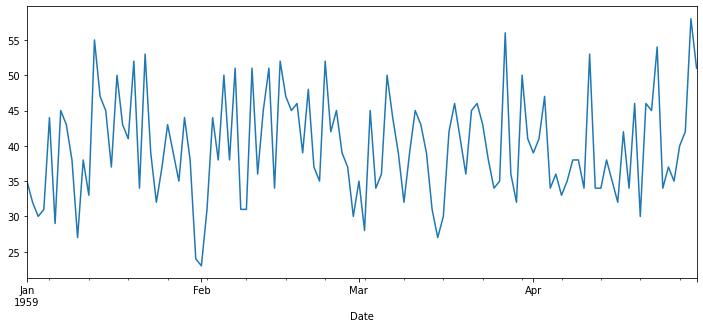

In [8]:
df1['Births'].plot(figsize=(12, 5))

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
        
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [14]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic     -9.855384e+00
p-value                 4.373545e-17
# Lags Used             0.000000e+00
# Observations          1.190000e+02
Critical Value (1%)    -3.486535e+00
Critical Value (5%)    -2.886151e+00
Critical Value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [15]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 09 Feb 2021   AIC                            823.489
Time:                        12:34:19   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [17]:
model = ARMA(train['Births'], order=(2, 2))

In [19]:
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Tue, 09 Feb 2021   AIC                            627.809
Time:                        12:37:31   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
start = len(train)
end = len(train) + len(test) - 1

In [22]:
predictions = results.predict(start, end).rename('ARMA 2,2 Predicitons')

In [23]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [24]:
predictions

1959-04-01    39.982221
1959-04-02    39.992613
1959-04-03    39.809829
1959-04-04    39.848173
1959-04-05    39.761537
1959-04-06    39.794254
1959-04-07    39.750500
1959-04-08    39.772833
1959-04-09    39.749660
1959-04-10    39.763667
1959-04-11    39.750991
1959-04-12    39.759431
1959-04-13    39.752354
1959-04-14    39.757336
1959-04-15    39.753334
1959-04-16    39.756243
1959-04-17    39.753963
1959-04-18    39.755651
1959-04-19    39.754347
1959-04-20    39.755322
1959-04-21    39.754574
1959-04-22    39.755137
1959-04-23    39.754708
1959-04-24    39.755032
1959-04-25    39.754785
1959-04-26    39.754972
1959-04-27    39.754830
1959-04-28    39.754937
1959-04-29    39.754856
1959-04-30    39.754918
Freq: D, Name: ARMA 2,2 Predicitons, dtype: float64

<AxesSubplot:xlabel='Date'>

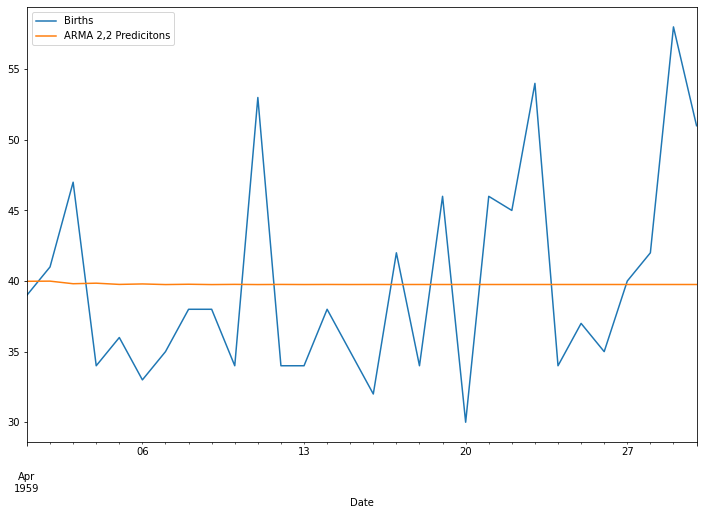

In [27]:
test['Births'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True)

In [28]:
test.mean()

Births    39.833333
dtype: float64

In [29]:
predictions.mean()

39.777433616219376

## ARIMA

<AxesSubplot:xlabel='Date'>

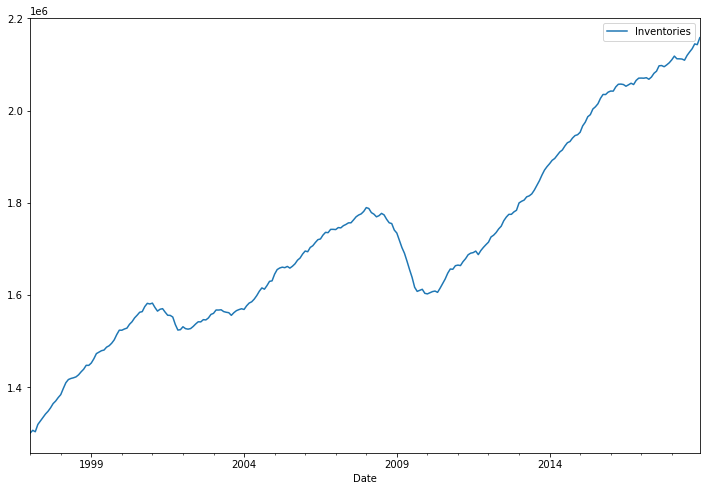

In [30]:
df2.plot(figsize=(12, 8))

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

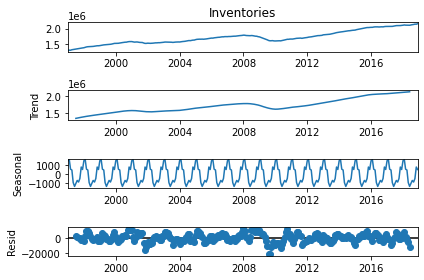

In [32]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

In [33]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 09 Feb 2021   AIC                           5348.037
Time:                        12:47:59   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.statespace.tools import diff

In [35]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [36]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic       -3.412249
p-value                   0.010548
# Lags Used               4.000000
# Observations          258.000000
Critical Value (1%)      -3.455953
Critical Value (5%)      -2.872809
Critical Value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


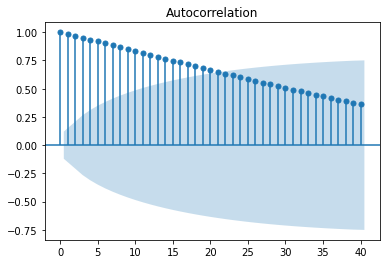

In [39]:
plot_acf(df2['Inventories'], lags=40);

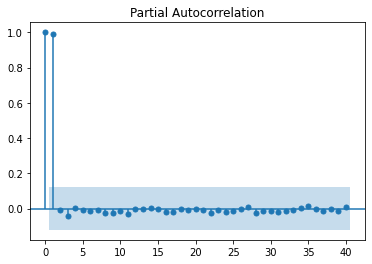

In [40]:
plot_pacf(df2['Inventories'], lags=40);

In [41]:
# AR = 1
# I = 1
# MA = 0 or 1

In [43]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, max_p=2, max_q=2, seasonal=False, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.566 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 09 Feb 2021   AIC                           5348.037
Time:                        13:00:10   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
len(df2)

264

In [45]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [46]:
model = ARIMA(train['Inventories'], order=(1, 1, 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Tue, 09 Feb 2021   AIC                           4980.790
Time:                        13:03:07   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.870      2.378      0.017     561.674    5833.466
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
start = len(train)
end = len(train) + len(test) - 1

In [48]:
predictions = results.predict(start, end, typ='levels').rename('ARIMA(1, 1, 1) Predictions')

In [49]:
predictions

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113887e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133764e+06
2018-10-01    2.137041e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA(1, 1, 1) Predictions, dtype: float64

In [50]:
test

,Inventories,Diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


<AxesSubplot:xlabel='Date'>

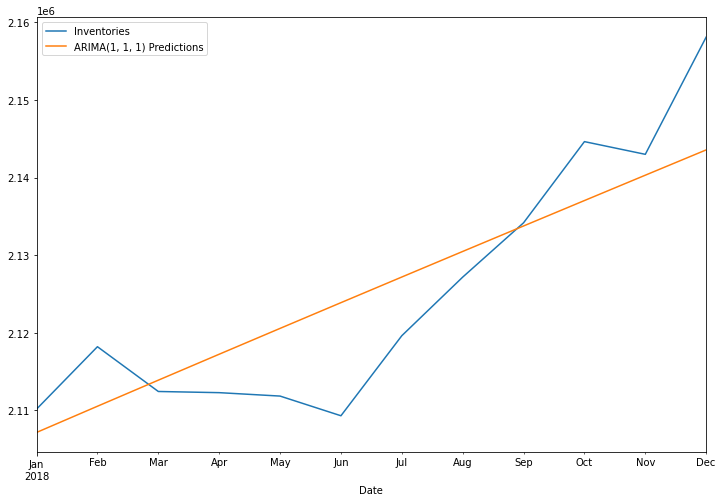

In [52]:
test['Inventories'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True)

In [53]:
from statsmodels.tools.eval_measures import rmse

In [54]:
error = rmse(test['Inventories'], predictions)

In [55]:
error

7789.59733099622

In [56]:
test['Inventories'].mean()

2125075.6666666665

In [57]:
predictions.mean()

2125465.271293396

## Forecast into unknown future

In [58]:
model = ARIMA(df2['Inventories'], order=(1, 1, 1))

In [60]:
results = model.fit()

In [69]:
fcast = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename('ARIMA (1, 1, 1) Forecast')

<AxesSubplot:xlabel='Date'>

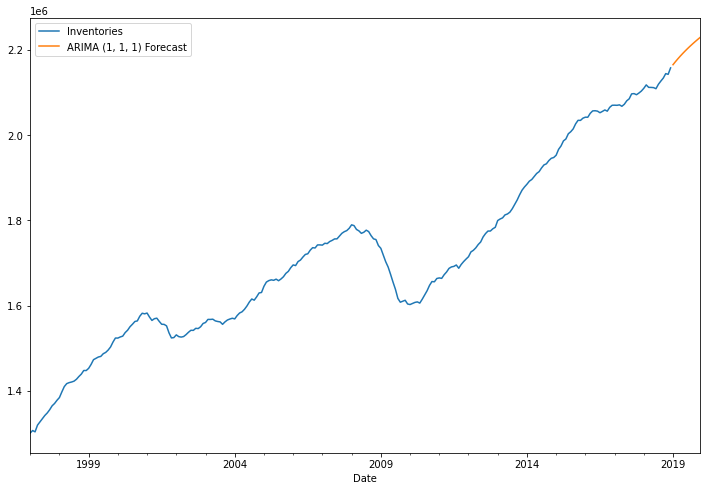

In [70]:
df2['Inventories'].plot(figsize=(12, 8), legend=True)
fcast.plot(legend=True)